In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import FunctionTransformer, make_pipeline
from scipy.stats import f_oneway

In [2]:
relative_json_directory = '../reddit3_output'


In [3]:
json_directory = os.path.abspath(relative_json_directory)

In [4]:
file_paths = [os.path.join(json_directory, file) for file in os.listdir(json_directory) if file.endswith('.json')]

In [5]:
dataframes = [pd.read_json(file_path, lines=True) for file_path in file_paths]


In [6]:
combined_dataframe = pd.concat(dataframes, ignore_index=True)

In [7]:
combined_dataframe[combined_dataframe['sentiment_score'] == -0.999]


,author,body,day_of_week,daytype,score,subreddit,timestamp,sentiment_score,readability_score,percentile,quality,ups
1092938,Xx69LeMemer69xX,👌👀👌👀👌👀👌👀👌👀 good shit go౦ԁ sHit👌 thats ✔ some g...,6,weekend,-18,canada,2016-01-30T22:45:10.000-08:00,-0.999,184.6,0.003683,bad,-18.0
1419172,Praetor80,30% sympathize with radicals. With suicide bo...,3,weekday,1,canada,2016-03-16T14:38:57.000-07:00,-0.999,14.1,0.162387,normal,1.0
1434547,hyene,&gt; But that doesn't support your claim chemo...,7,weekend,1,canada,2016-12-11T14:58:55.000-08:00,-0.999,7.8,0.162387,normal,NaN
1478867,nxclei,&gt; In this case it clearly does. If I become...,7,weekend,1,canada,2016-04-10T18:59:08.000-07:00,-0.999,7.0,0.162387,normal,1.0
1534518,dark_purpose,&gt; 1.1 million property crime violations in ...,4,weekday,1,canada,2016-02-11T13:15:05.000-08:00,-0.999,11.5,0.162387,normal,1.0
1771830,canadianpeng,Ehhh... go look on http://canlii.org; it's usu...,5,weekday,2,canada,2016-11-18T19:27:14.000-08:00,-0.999,9.3,0.452444,normal,NaN
1779308,moeburn,"&gt; No, it shouldn't because it's disgusting ...",5,weekday,2,canada,2016-01-15T22:58:09.000-08:00,-0.999,9.7,0.452444,normal,2.0
1819748,tazias04,&gt; Who said that the executions are a loved ...,6,weekend,2,canada,2016-01-02T10:20:24.000-08:00,-0.999,7.5,0.452444,normal,2.0
1843100,Nah_ImWearingAxe,Perhaps not as abundant but still a major issu...,1,weekday,2,canada,2016-07-11T18:59:05.000-07:00,-0.999,10.7,0.452444,normal,2.0
2269002,hamudm,I'm just going to spout some seemingly random ...,2,weekday,8,canada,2016-03-22T09:33:12.000-07:00,-0.999,13.1,0.844150,normal,8.0


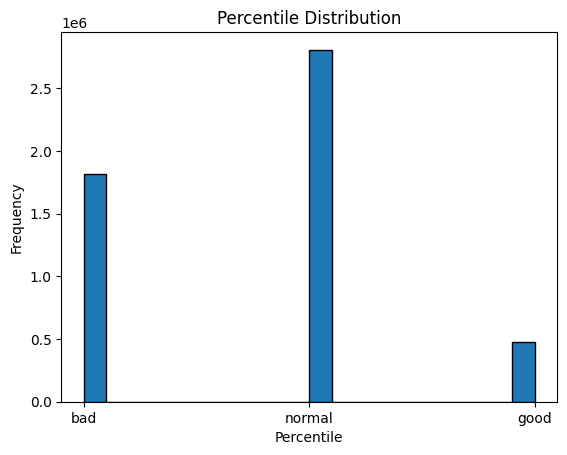

In [8]:
plt.hist(combined_dataframe['quality'], bins=20, edgecolor='black')
plt.xlabel('Percentile')
plt.ylabel('Frequency')
plt.title('Percentile Distribution')
plt.show()

In [9]:
sid=combined_dataframe['readability_score'].idxmax()


In [10]:

stats.normaltest(combined_dataframe['score'])

NormaltestResult(statistic=21198622.32967564, pvalue=0.0)

In [11]:
stats.mannwhitneyu(combined_dataframe['score'],combined_dataframe['readability_score'])

MannwhitneyuResult(statistic=6478243985738.0, pvalue=0.0)

In [12]:
contingency_table = pd.crosstab( combined_dataframe['daytype'],combined_dataframe['quality'])

In [13]:
contingency_table

quality,bad,good,normal
daytype,,,
weekday,1364880,354456,2151871
weekend,449156,123750,656211


In [14]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


In [15]:
p_value

0.0

Pipeline(steps=[('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(10, 10, 10)))])

0.6629852019234068

In [ ]:
combined_dataframe['readability_score'].corr(combined_dataframe['percentile'])

In [17]:
# Perform ANOVA test
good_scores = combined_dataframe[combined_dataframe['quality'] == 'good']['readability_score']
normal_scores = combined_dataframe[combined_dataframe['quality'] == 'normal']['readability_score']
bad_scores = combined_dataframe[combined_dataframe['quality'] == 'bad']['readability_score']

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(good_scores, normal_scores, bad_scores)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 96.49251635336303
p-value: 1.2434416258186803e-42


In [15]:
good_scores, bad_scores

(986510     0.0000
 986511     0.5556
 986512     0.0000
 986513     0.3818
 986514    -0.6715
             ...  
 5100319    0.4473
 5100320   -0.0772
 5100321    0.9776
 5100322    0.7960
 5100323    0.6124
 Name: sentiment_score, Length: 478206, dtype: float64,
 0          0.0000
 1         -0.1027
 2         -0.6829
 3          0.4329
 4         -0.2960
             ...  
 4942330    0.4574
 4942331    0.3709
 4942332    0.8051
 4942333    0.3788
 4942334    0.7415
 Name: sentiment_score, Length: 1814036, dtype: float64)

KeyError: 1

In [19]:
from sklearn.preprocessing import LabelEncoder



In [24]:
label_encoder = LabelEncoder()
combined_dataframe['subreddit_encoded'] = label_encoder.fit_transform(combined_dataframe['subreddit'])


,author,body,day_of_week,daytype,score,subreddit,timestamp,sentiment_score,readability_score,percentile,...,reddit_apple,reddit_canada,reddit_cats,reddit_explainlikeimfive,subreddit_MechanicalKeyboards,subreddit_apple,subreddit_canada,subreddit_cats,subreddit_explainlikeimfive,subreddit_encoded
0,ImANetworkEngineer,It's not.,5,weekday,-433,apple,2016-12-30T13:30:35.000-08:00,0.0000,-3.1,0.000000e+00,...,True,False,False,False,False,True,False,False,False,1
1,ImANetworkEngineer,"I have hard evidence, I just can't show it to ...",5,weekday,-388,apple,2016-12-30T13:44:04.000-08:00,-0.1027,6.0,9.193441e-07,...,True,False,False,False,False,True,False,False,False,1
2,JustinGitelmanMusic,This is actually not that impressive. This is ...,2,weekday,-314,apple,2016-10-18T21:03:06.000-07:00,-0.6829,5.1,1.838688e-06,...,True,False,False,False,False,True,False,False,False,1
3,boogeyman69420,&gt; I doubt Apple even knew the Mac mini or M...,5,weekday,-257,apple,2016-12-23T10:06:07.000-08:00,0.4329,7.7,2.758032e-06,...,True,False,False,False,False,True,False,False,False,1
4,CAPSLOCKME,bla bla bla no one cars,2,weekday,-213,apple,2016-12-13T11:45:07.000-08:00,-0.2960,-1.5,3.677376e-06,...,True,False,False,False,False,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100319,Marmie_McMom,edit: Okay friends...adding ONE MORE video at...,2,weekday,1940,cats,2016-09-27T15:56:02.000-07:00,0.4473,5.9,9.999855e-01,...,False,False,True,False,False,False,False,True,False,3
5100320,Mystery_poop,4 cats...\n\n18 toes each...\n\nThat's 72 claw...,7,weekend,2047,cats,2016-08-28T20:19:55.000-07:00,-0.0772,-0.8,9.999891e-01,...,False,False,True,False,False,False,False,True,False,3
5100321,0110010001100010,If you cannot find anyone else please let me k...,3,weekday,2315,cats,2016-03-02T07:55:25.000-08:00,0.9776,4.5,9.999928e-01,...,False,False,True,False,False,False,False,True,False,3
5100322,mehrlicht,That's extremely sweet of you. Sending the PM...,4,weekday,2370,cats,2016-12-29T20:16:27.000-08:00,0.7960,1.7,9.999964e-01,...,False,False,True,False,False,False,False,True,False,3
